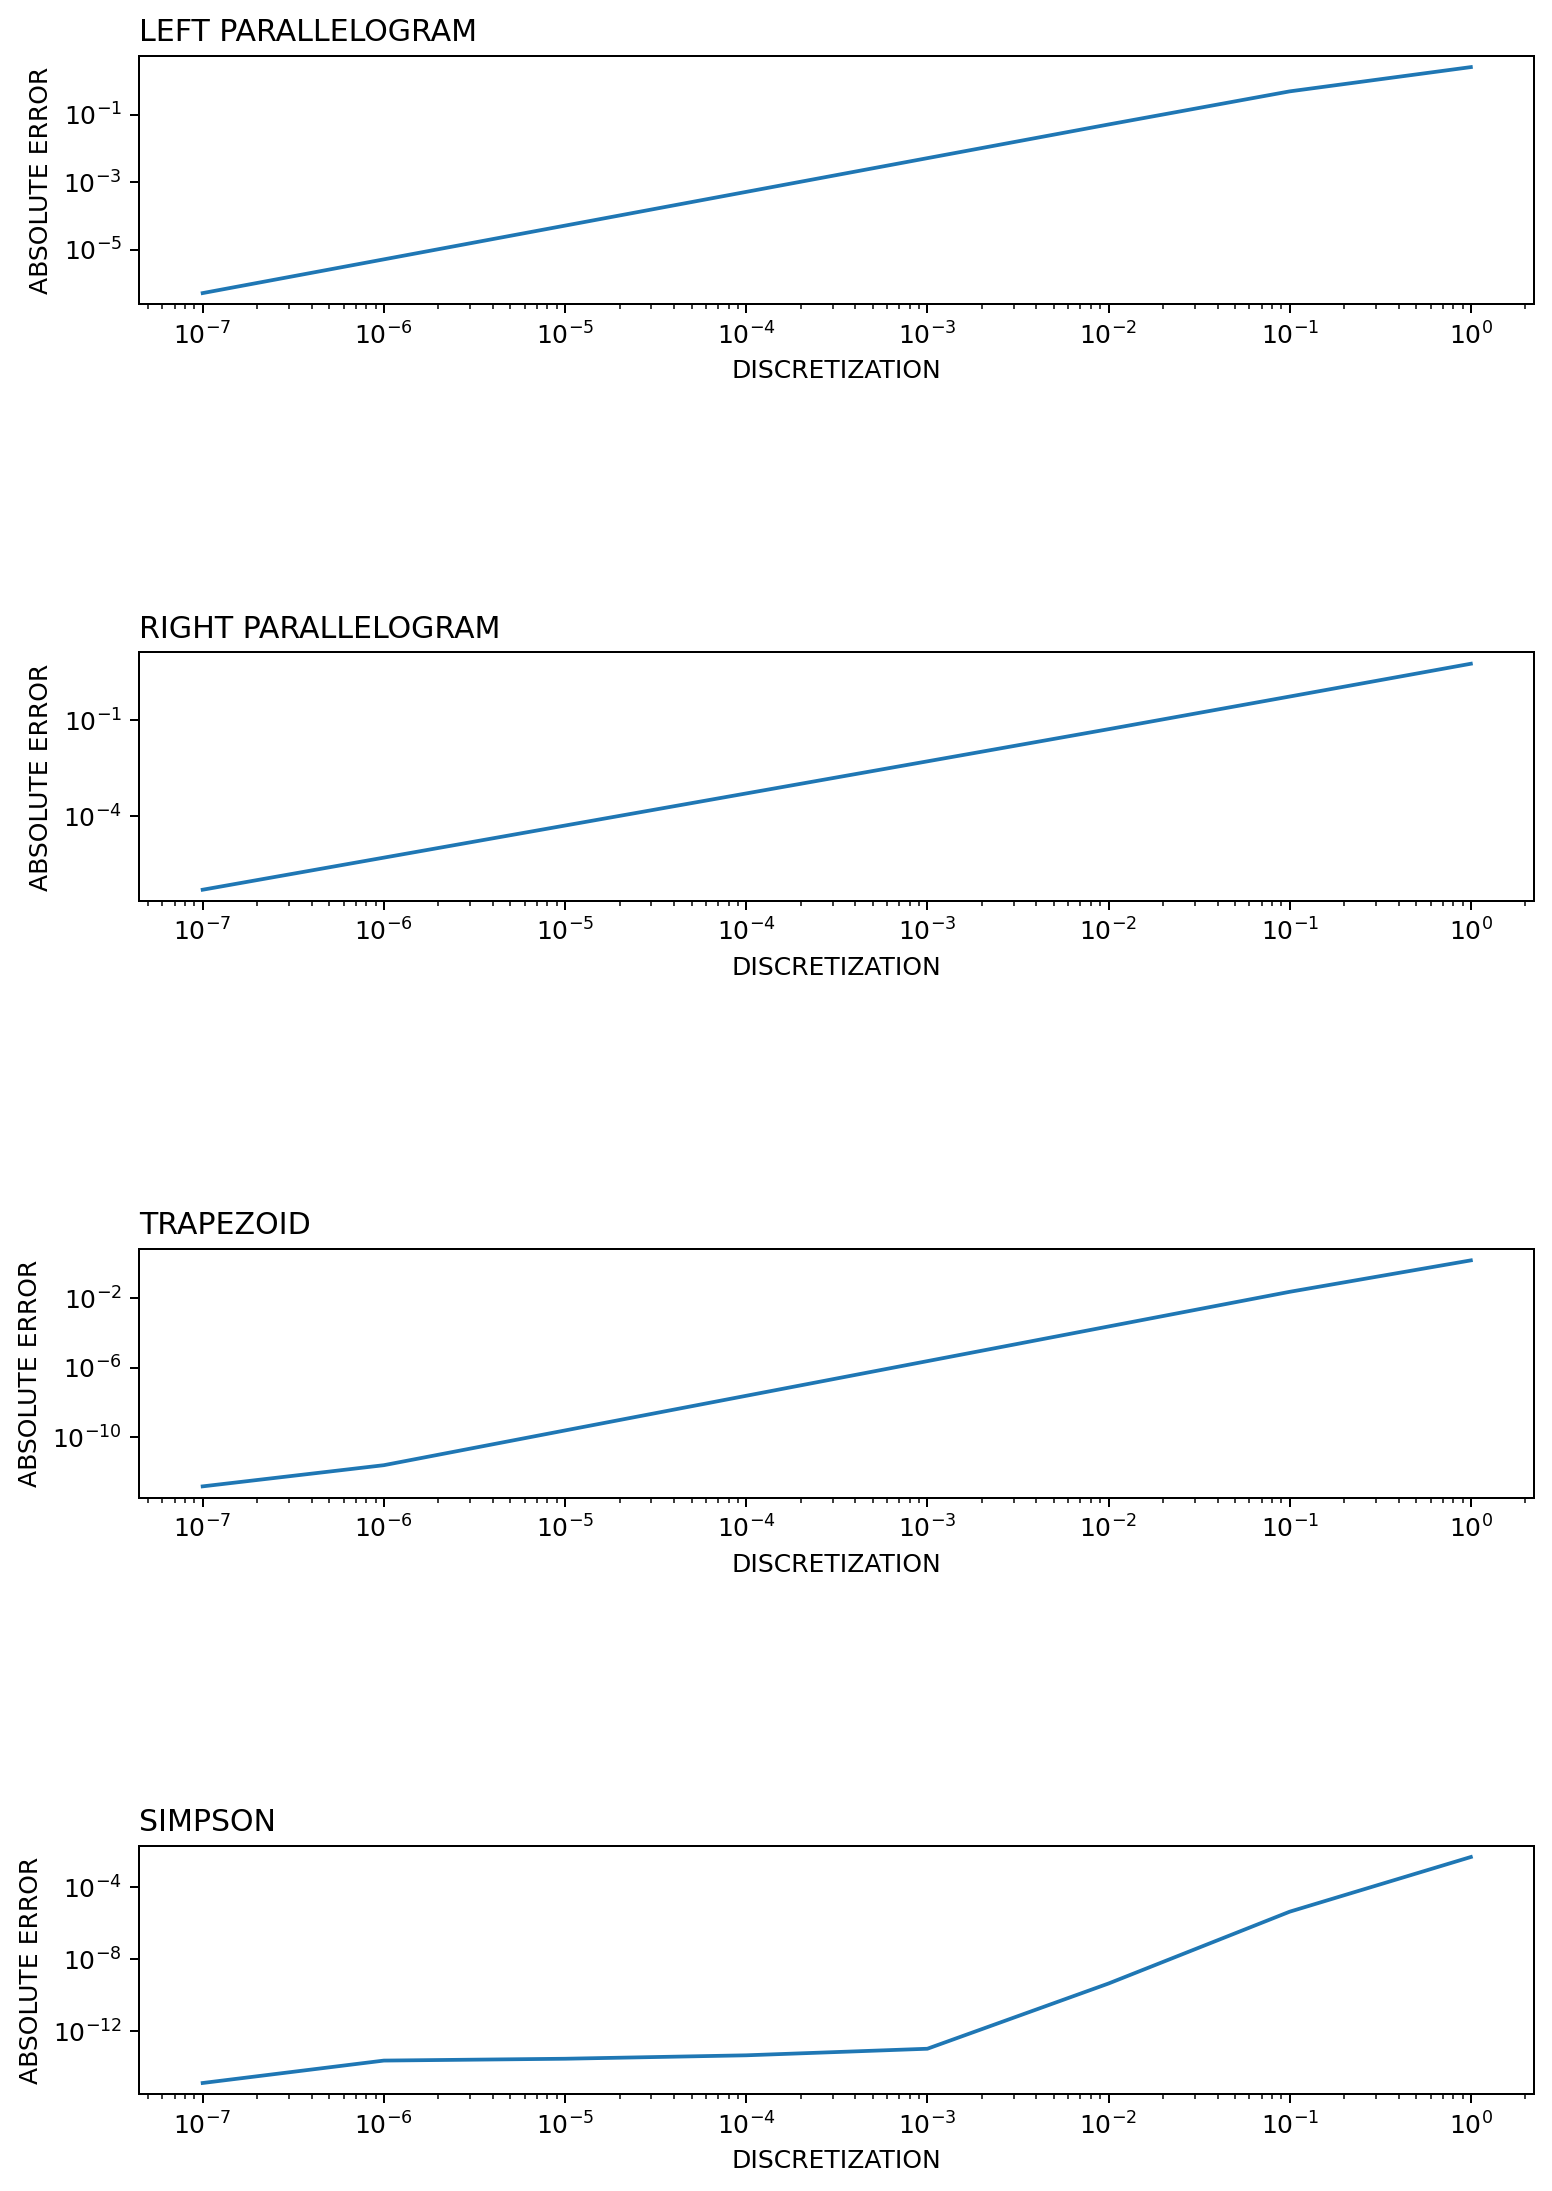

In [2]:
#Marios Tzamtzis 10038 - Pantelis Tsipis 10224 
#EXERCISE 1
import matplotlib.pyplot as plt
from math import sin, exp, pi


def left_parallelogram(a, b, n, f):
    h = (b-a)/n
    sum = 0
    for i in range(0, n):
        x = a + (i * h)
        sum += f(x)

    I = h * sum
    return I


def right_parallelogram(a, b, n, f):
    h = (b - a) / n
    sum = 0
    for i in range(1, n+1):
        x = a + (i * h)
        sum += f(x)

    I = h * sum
    return I


def trapezoid(a, b, n, f):
    h = (b - a) / n
    I = (h / 2) * f(a)
    for i in range(1, n):
        x = a + (i * h)
        I += h * f(x)

    I += (h / 2) * f(b)

    return I


def simpson(a, b, n, f):
    h = (b - a) / n
    I = (h / 6) * f(a)
    for i in range(1,(2*n),2):
        x = a + (i * (h / 2))
        I += (2 / 3) * h * f(x)

    for j in range(2,(2 * n - 1),2):
        x = a + (j * (h / 2))
        I += (1 / 3) * h * f(x)

    I += (h / 6) * f(b)

    return I


def main():
    w = 10
    h = 15
    d = 180
    plt.figure(figsize=(w, h), dpi=d)
    f = lambda p: exp(3 * p) * sin(2 * p)
    # left_parallelogram
    x=[]
    for i in range(-7, 1):
        x.append(pow(10, i))
        x.sort()
    y = []
    y.append(abs((1 / 13)*(3*exp(0.75*pi)+2) - (left_parallelogram(0, (0.25 * pi), 1, f))))
    for i in range (1, 8):
        y.append(abs((1 / 13)*(3*exp(0.75*pi)+2) - (left_parallelogram(0, 0.25*pi, 8 * pow(10, i-1), f))))
    y.sort()
    plt.subplot(7,1,1)
    plt.loglog(x, y)
    plt.title("LEFT PARALLELOGRAM", loc = 'left')
    plt.xlabel("DISCRETIZATION")
    plt.ylabel("ABSOLUTE ERROR")


    #right_parallelogram
    x.clear()
    y.clear()
    for i in range(-7, 1):
        x.append(pow(10, i))
        x.sort()
    y.append(abs((1 / 13) * (3 * exp(0.75 * pi) + 2) - (right_parallelogram(0, (0.25 * pi), 1, f))))
    for i in range(1, 8):
        y.append(abs((1 / 13) * (3 * exp(0.75 * pi) + 2) - (right_parallelogram(0, 0.25 * pi, 8 * pow(10, i - 1), f))))
    y.sort()
    plt.subplot(7, 1, 3)
    plt.loglog(x, y)
    plt.title("RIGHT PARALLELOGRAM", loc = 'left')
    plt.xlabel("DISCRETIZATION")
    plt.ylabel("ABSOLUTE ERROR")

    #trapezoid
    x.clear()
    y.clear()
    for i in range(-7, 1):
        x.append(pow(10, i))
        x.sort()
    y.append(abs((1 / 13) * (3 * exp(0.75 * pi) + 2) - (trapezoid(0, (0.25 * pi), 1, f))))
    for i in range(1, 8):
        y.append(abs((1 / 13) * (3 * exp(0.75 * pi) + 2) - (trapezoid(0, 0.25 * pi, 8 * pow(10, i - 1), f))))
    y.sort()
    plt.subplot(7, 1, 5)
    plt.loglog(x, y)
    plt.title("TRAPEZOID", loc='left')
    plt.xlabel("DISCRETIZATION")
    plt.ylabel("ABSOLUTE ERROR")

    #Simpson
    x.clear()
    y.clear()
    for i in range(-7, 1):
        x.append(pow(10, i))
        x.sort()
    y.append(abs((1 / 13) * (3 * exp(0.75 * pi) + 2) - (simpson(0, (0.25 * pi), 1, f))))
    for i in range(1, 8):
        y.append(abs((1 / 13) * (3 * exp(0.75 * pi) + 2) - (simpson(0, 0.25 * pi, 8 * pow(10, i - 1), f))))
    y.sort()
    plt.subplot(7, 1, 7)
    plt.loglog(x, y)
    plt.title("SIMPSON", loc = 'left')
    plt.xlabel("DISCRETIZATION")
    plt.ylabel("ABSOLUTE ERROR")
    plt.show()

main()

Γενικά παρατηρούμε ότι όσο μικρότερο είναι το βήμα διακριτοποίησης τόσο μικρότερο ειναι και το απόλυτο σφάλμα, ενώ όταν μεγαλώνουμε το βήμα διακριτοποίησης μεγαλώνει θεαματικά και το σφάλμα.
Όσον αφορά τώρα την αποτελεσματικότερη μέθοδο, αυτή δηλαδή με το μικρότερο απόλυτο σφάλμα για αντίστοιχα βήματα διακριτοποίησης, αυτή είναι η μέθοδος του Simpson. Η δεύτερη πιο αποτελεσματική μέθοδος ειναι η μέθοδος του τραπεζίου, ενώ οι μέθοδοι του αριστερού και του δεξιού παραλληλογράμμου συγκλίνουν περίπου σε ίδιας τάξης απόλυτο σφάλμα.

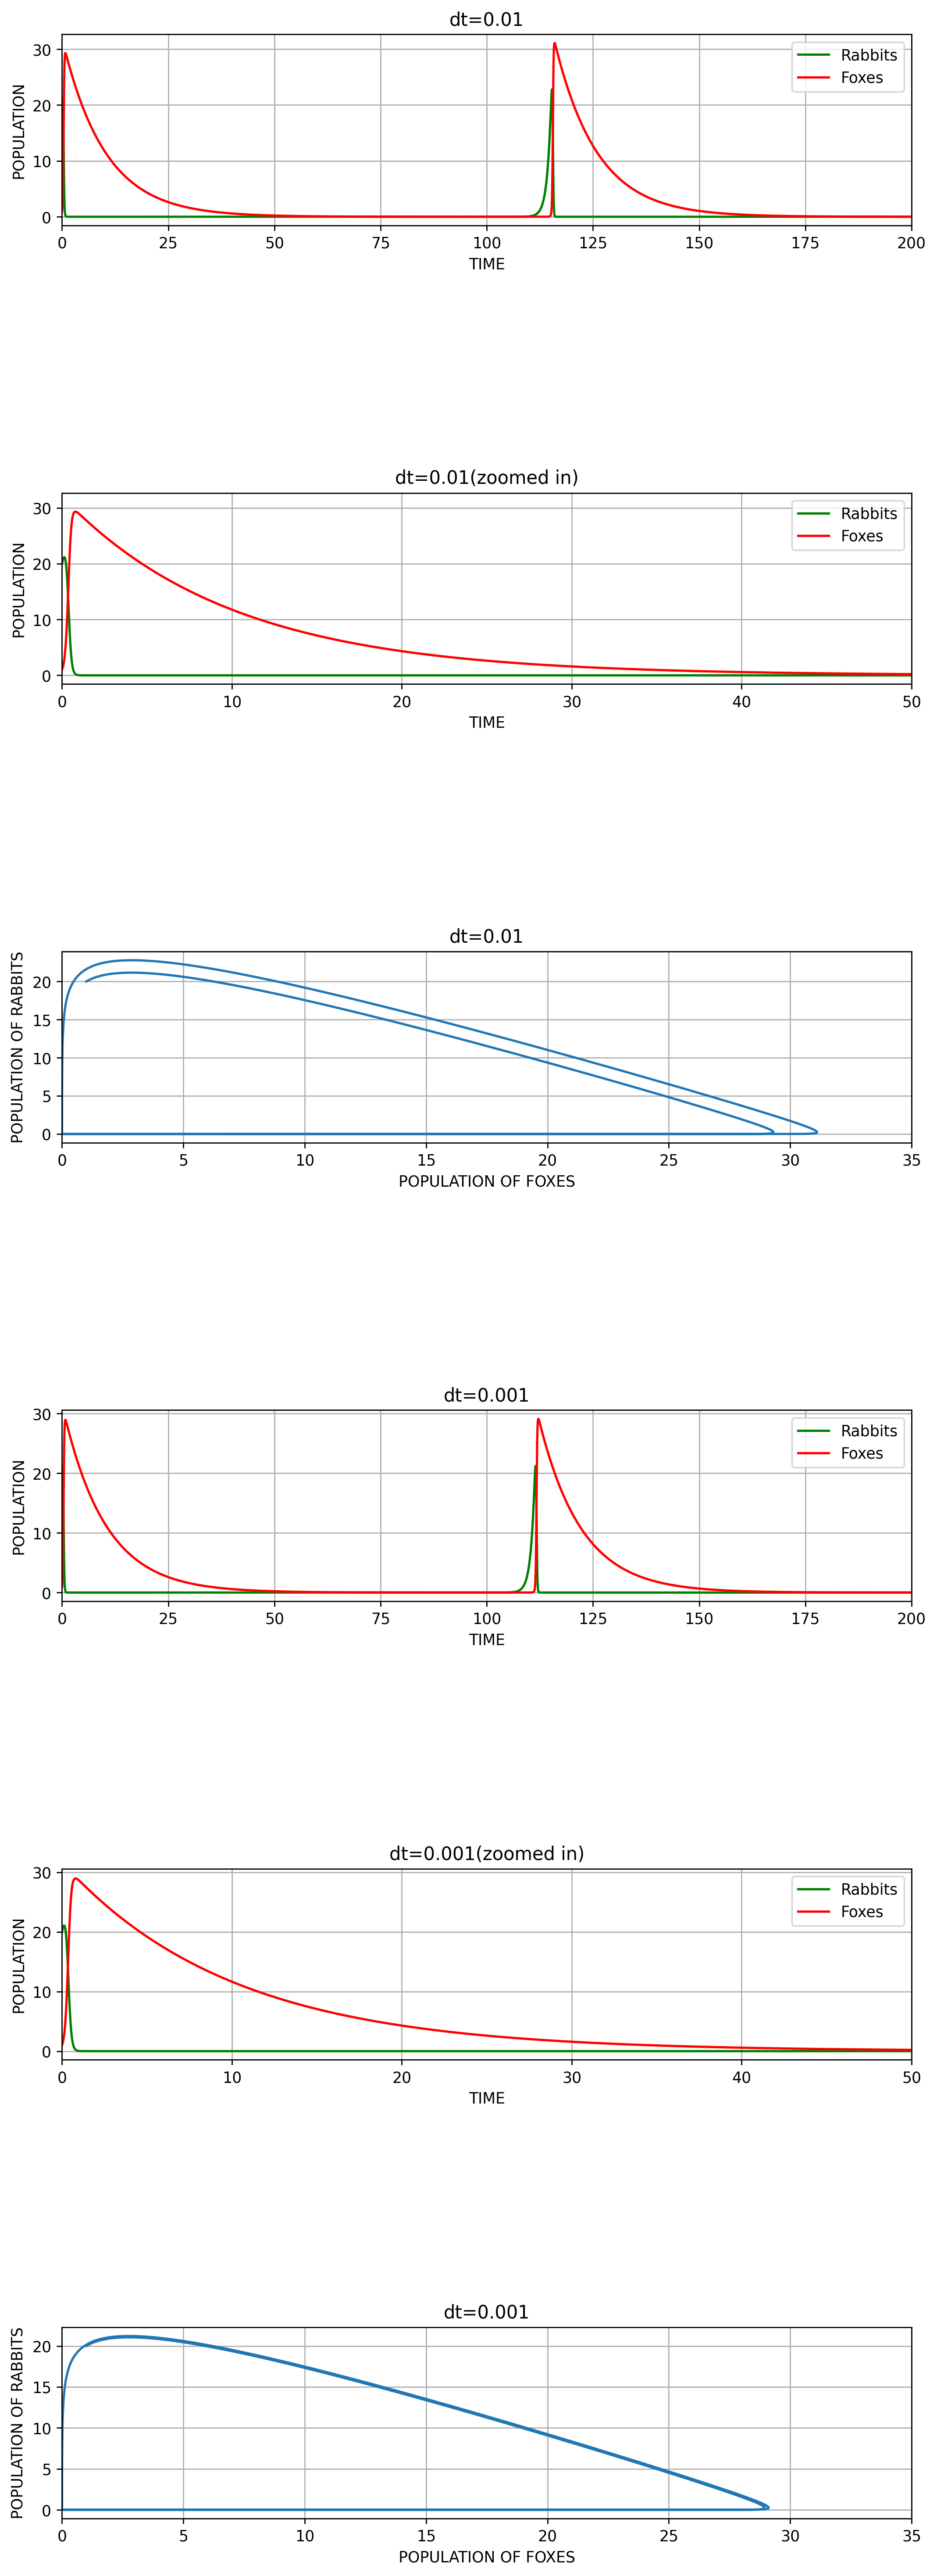

In [30]:
#EXERCISE 2
# EXERCISE 2
import numpy as np
import matplotlib.pyplot as plt


def euler(F, tO, tmax, xO, dt):
    t = np.arange(tO, tmax, dt)
    x = np.zeros((len(t), len(xO)))
    for i in range(len(xO)):
        x[0, i] = xO[i]
    for n in range(len(t) - 1):
        x[n + 1, :] = x[n, :] + dt * F(t[n], x[n, :])
    return t, x

def main():
    w = 10
    h = 30
    d = 250
    plt.figure(figsize=(w, h), dpi=d)
    xO = [20, 1]
    F = lambda t, x: np.array([1.1 * x[0] - 0.4 * x[0] * x[1], 0.4 * x[0] * x[1] - 0.1 * x[1]])
    tO = 0
    tmax = 200
    dt = 0.01
    t, x = euler(F, tO, tmax, xO, dt)
    print 

    w=[]
    p=[]
    q=[]

    for i in range(len(t)):
        w.append(t[i])
        p.append(x[i, 0])
        q.append(x[i, 1])
    plt.subplot(11, 1, 1)
    plt.plot(t, x[:, 0], '-g', label="Rabbits")
    plt.plot(t, x[:, 1], '-r', label="Foxes")
    plt.grid(True)
    plt.xlim(0, 200)
    plt.legend()
    plt.title("dt=0.01")
    plt.xlabel("TIME")
    plt.ylabel("POPULATION")
    
    plt.subplot(11, 1, 3)
    plt.plot(t, x[:, 0], '-g', label="Rabbits")
    plt.plot(t, x[:, 1], '-r', label="Foxes")
    plt.grid(True)
    plt.xlim(0, 50)
    plt.legend()
    plt.title("dt=0.01(zoomed in)")
    plt.xlabel("TIME")
    plt.ylabel("POPULATION")

    plt.subplot(11, 1, 5)
    plt.plot(q, p)
    plt.grid(True)
    plt.xlim(0, 35)
    plt.title("dt=0.01")
    plt.xlabel("POPULATION OF FOXES")
    plt.ylabel("POPULATION OF RABBITS")

    dt = dt / 10
    t, x = euler(F, tO, tmax, xO, dt)
    w.clear()
    p.clear()
    q.clear()

    for i in range(len(t)):
        w.append(t[i])
        p.append(x[i, 0])
        q.append(x[i, 1])
    plt.subplot(11, 1, 7)
    plt.plot(t, x[:, 0], '-g', label="Rabbits")
    plt.plot(t, x[:, 1], '-r', label="Foxes")
    plt.grid(True)
    plt.xlim(0, 200)
    plt.legend()
    plt.title("dt=0.001")
    plt.xlabel("TIME")
    plt.ylabel("POPULATION")
    
    plt.subplot(11, 1, 9)
    plt.plot(t, x[:, 0], '-g', label="Rabbits")
    plt.plot(t, x[:, 1], '-r', label="Foxes")
    plt.grid(True)
    plt.xlim(0, 50)
    plt.legend()
    plt.title("dt=0.001(zoomed in)")
    plt.xlabel("TIME")
    plt.ylabel("POPULATION")
    
    plt.subplot(11, 1, 11)
    plt.plot(q, p)
    plt.grid(True)
    plt.xlim(0, 35)
    plt.title("dt=0.001")
    plt.xlabel("POPULATION OF FOXES")
    plt.ylabel("POPULATION OF RABBITS")

    plt.show()

main()

Παρατηρούμε, ότι στην αρχή μειώνεται κατακόρυφα ο πληθυσμός των λαγών ενώ αυξάνεται κατακόρυφα ο πληθυσμός των αλεπούδων. Στη συνέχεια κι αφου έχει μηδενιστεί ο πληθυσμός των λαγών οι αλεπούδες μην έχοντας τροφή αρχίζουν και μειώνονται ώσπου μηδενίζονται κι αυτές. Μετά από ένα χρονικό σημείο ξαναεμφανίζονται λαγοί οι οποίοι αυξάνονται κατακόρυφα και μετά από λίγο αρχίζουν να αυξάνονται και οι αλεπούδες. Αυτή η αύξηση των αλεπούδων προκαλεί εκ νέου εξαφανισμό των λαγών κι αυτες με την σειρά τους, μην έχοντας τροφή, ξαναεξαφανίζονται.
Με την διαφοροποίηση των dt ουσιαστική διαφορά στα διαγράμματα παρατηρούμε μόνο στο phase plot. Με dt=0.01 βλέπουμε 2 παράλληλες γραμμές(επείδή υπάρχουν 2 αυξομειώσεις των πληθυσμών) λόγω μικρότερης ακρίβειας της μεθόδου Euler, ενώ με dt=0.001 οι 2 γραμμές ουσιαστικά ταυτίζονται λόγω μεγαλύτερης ακρίβειας. Όσο μικρότερο είναι το βήμα διακριτοποίησης τόσο πιο ακριβής είναι η μέθοδος Euler.